In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_notes = pd.read_csv('./physionet.org/files/mimiciii/1.4/NOTEEVENTS.csv')
df_notes = df_notes.sort_values(by=['SUBJECT_ID','HADM_ID','CHARTDATE'])

### Clinical notes data size

In [8]:
df_notes.shape

(10000, 11)

In [6]:
df_notes.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
1671019,1678765,2,163353.0,2138-07-17,2138-07-17 23:08:00,2138-07-17 23:18:00,Nursing/other,Report,17774.0,NaN,Nursing Transfer note\n\n\nPt admitted to NICU...
1671574,1678764,2,163353.0,2138-07-17,2138-07-17 22:51:00,2138-07-17 23:12:00,Nursing/other,Report,16929.0,NaN,Neonatology Attending Triage Note\n\nBaby [**N...
291434,272790,3,145834.0,2101-10-20,NaN,NaN,ECG,Report,NaN,NaN,Sinus rhythm\nInferior/lateral T changes are n...
765990,768818,3,145834.0,2101-10-20,2101-10-20 22:23:00,NaN,Radiology,CHEST (PORTABLE AP),NaN,NaN,[**2101-10-20**] 10:23 PM\n CHEST (PORTABLE AP...
766114,768809,3,145834.0,2101-10-20,2101-10-20 18:16:00,NaN,Radiology,CHEST (PORTABLE AP),NaN,NaN,[**2101-10-20**] 6:16 PM\n CHEST (PORTABLE AP)...


### Dive in for different category

In [55]:
print("# of category in the data: ", df_notes.CATEGORY.nunique())
print("Categories in the data: ", list(df_notes.CATEGORY.unique()))

# of category in the data:  14
Categories in the data:  ['Nursing/other', 'ECG', 'Radiology', 'Echo', 'Discharge summary', 'Nursing', 'Physician ', 'Case Management ', 'General', 'Respiratory ', 'Nutrition', 'Pharmacy', 'Social Work', 'Rehab Services']


### Count

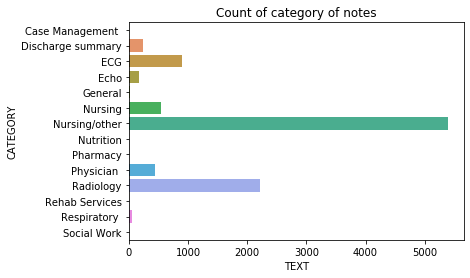

In [19]:
df_notes_cat = df_notes.groupby("CATEGORY").count()[["TEXT"]].reset_index()
plt.title("Count of category of notes")
sns.barplot(y="CATEGORY", x="TEXT", data=df_notes_cat)
plt.show()

In [28]:
import re
def preprocess1(x):
    y=re.sub('\\[(.*?)\\]','',x) #remove de-identified brackets
    y=re.sub('[0-9]+\.','',y) #remove 1.2. since the segmenter segments based on this
    y=re.sub('dr\.','doctor',y)
    y=re.sub('m\.d\.','md',y)
    y=re.sub('admission date:','',y)
    y=re.sub('discharge date:','',y)
    y=re.sub('--|__|==','',y)
    return y

def preprocessing(df_less_n): 
    df_less_n['TEXT']=df_less_n['TEXT'].fillna(' ')
    df_less_n['TEXT']=df_less_n['TEXT'].str.replace('\n',' ')
    df_less_n['TEXT']=df_less_n['TEXT'].str.replace('\r',' ')
    df_less_n['TEXT']=df_less_n['TEXT'].apply(str.strip)
    df_less_n['TEXT']=df_less_n['TEXT'].str.lower()

    df_less_n['TEXT']=df_less_n['TEXT'].apply(lambda x: preprocess1(x))
    df_less_n['TEXT LEN']=df_less_n['TEXT'].apply(lambda x: len(x.split()))

    return df_less_n[['CATEGORY', 'DESCRIPTION', 'TEXT', 'TEXT LEN']]

### Length of notes

In [29]:
df_test = preprocessing(df_notes)

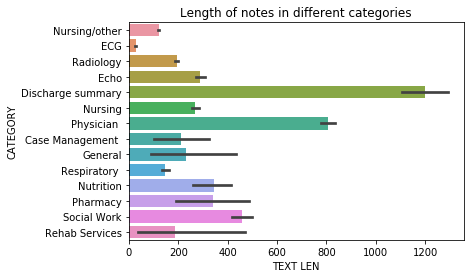

In [49]:
plt.title("Length of notes in different categories")
sns.barplot(y="CATEGORY", x="TEXT LEN", data=df_test)
plt.show()

### Examples

In [51]:
df_examples = df_test.groupby("CATEGORY").head(1)[['CATEGORY', 'TEXT']].sort_values(by='CATEGORY').set_index(keys='CATEGORY')
d_examples = df_examples['TEXT'].to_dict()
# print text examples for each category
for k in d_examples:
    print(k,'\n', d_examples[k],'\n\n')

Case Management  
 title:  case management initial assessment    patient is well-known to this ncm from multiple and frequent previous     admissions.  patient discharged from  on  with home    care services from vna of .  she has been followed by the agency    on a number of occasions in the past.  anticipate that the patient will    be discharged to home with resumption of vna services.  ncm has    notified the vna of  liaison, and she will follow to facilitate    resumption of services.  ncm will follow for any change in plan.    please call/page for any questions or concerns.     , rn, bsn    case manager, micu service    office:   or pager # 


Discharge summary 
 date of birth:        sex:  m  service:  medicine  chief complaint:  admitted from rehabilitation for hypotension (systolic blood pressure to the 70s) and decreased urine output.  history of present illness:  the patient is a 76-year-old male who had been hospitalized at the  from  through  of  after undergoing a left fe

## Note

I check the source code of ClinicalNote, they only use category 'Discharge summary'. Why? 
and do we want to train with discharge summary only too? What's the category of the Langone data. 